In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
from scipy import stats
from biom.parse import load_table
from skbio.stats.distance import bioenv
from skbio.stats.distance import permanova
from skbio.stats.distance import anosim
from skbio.stats.distance import DistanceMatrix
import skbio
from matplotlib import rcParams as rcParams
from matplotlib import pyplot as plt
import matplotlib.pylab as pl
from matplotlib.colors import ListedColormap
from mpl_toolkits.axes_grid1 import make_axes_locatable
from matplotlib.lines import Line2D
from matplotlib import rc as rc
import matplotlib.gridspec as gridspec
# from skbio.stats.composition import ancom
# from skbio.stats.distance import distancematrix
from skbio.diversity import beta_diversity
from skbio.stats.ordination import pcoa
from sklearn import decomposition
from sklearn.preprocessing import scale
import matplotlib.gridspec as gridspec

%matplotlib inline

In [2]:
map_df = pd.read_csv('../monsoon/NLFA_stan/FINAL_MAPPING_FILE_FIXED_SOIL_CORRECT.csv', index_col=0)[:42]
map_df['New_P'] = map_df['New_P']/1000
pca_list = ['Clay', 'Silt', 'Sand', 'pH_H2O', 'TotFeppm', 'TotCappm'] # No rainfall 'Rainfall'
pca_df = map_df[pca_list].values
X = scale(pca_df)
pca = decomposition.PCA(n_components=3)
pca = pca.fit(X)
X = pca.transform(X)

print pca.explained_variance_ratio_
print pd.DataFrame(pca.components_, columns=pca_list).T

pca_out_df = pd.DataFrame(X, columns= ['PC1x', 'PC2x', 'PC3x'], index=map_df.index)
map_df = pd.concat([map_df, pca_out_df], axis=1)
map_df[:5]

[ 0.77789243  0.1740847   0.02573275]
                 0         1         2
Clay      0.452528  0.145987 -0.137839
Silt      0.411272  0.429180 -0.245974
Sand     -0.433261 -0.332878  0.210581
pH_H2O    0.295840 -0.725752 -0.209561
TotFeppm  0.432977 -0.028570  0.895267
TotCappm  0.404188 -0.395161 -0.175311


,BarcodeSequence,LinkerPrimerSequence,Clusters,Study,Site,Graztrt,PC1,PC2,LeafPmg,NPP,...,SoilNpct_noBD,SoilNpct,SOM_2012_noBD,SOM_2012,SOM,SoilNtoP,Description,PC1x,PC2x,PC3x
#SampleID,,,,,,,,,,,,,,,,,,,,,
BAL1,AGCGCAATCCTATCCT,CGG,Middle,Soil,BAL,G,-2.633266,1.267893,2.727501,10763.0,...,0.14,0.20608,5.907,8.695104,0.04,0.000402,27,-2.743853,-0.857368,0.449538
BAL2,AGCGCAATCCAAGAGA,ACG,Middle,Soil,BAL,UG,-2.784857,1.649824,2.684698,10763.0,...,0.21,0.29211,5.458,7.592078,0.04,0.000675,28,-2.930743,-1.284514,0.296729
BAL3,AGCGCAATTGTGATGG,TTA,Middle,Soil,BAL,G,-1.251854,0.236258,6.586135,10763.0,...,0.13,0.19799,7.398,11.267154,0.05,0.000275,29,-1.127777,-0.095610,0.076899
BAL4,AGCGCAATATTCCTGC,CGG,Middle,Soil,BAL,G,-1.347064,0.289184,3.975403,10763.0,...,0.30,0.41670,7.458,10.359162,0.06,0.000523,30,-1.256235,-0.112801,0.186331
BAL5,AGCGCAATCCTTTGTG,ACG,Middle,Soil,BAL,UG,-1.520938,0.043094,5.438472,10763.0,...,0.14,0.18214,7.692,10.007292,0.06,0.000239,31,-1.427871,0.272975,-0.135120


In [3]:
sum(pca.explained_variance_ratio_)

0.97770987487673877

In [4]:
map_df_soil = pd.read_csv('../tmp_soil_df.csv', index_col = 0)
map_df_soil['Study'] = 'Soil'

map_df_root = pd.read_csv('../tmp_root_df.csv', index_col = 0)
map_df_root['Study'] = 'Roots'
map_df_full = pd.concat([map_df_soil,map_df_root])
map_df_root[:5]

,BarcodeSequence,LinkerPrimerSequence,Clusters,Study,Site,Graztrt,Bulk_Density,Clay,Silt,Sand,...,SOM_2012_noBD,SOM_2012,SOM,SoilNtoP,Description,Plant_Species,PC1,PC2,PC3,Plot
#SampleID,,,,,,,,,,,,,,,,,,,,,
BALDM0152,GTACGTTCGTCAGATG,ACG,Middle,Roots,BAL,G,1.472,6.371840,20.711860,72.91630,...,5.907,8.695104,0.04,0.000402,27,DM,-2.743853,-0.857368,0.449538,BAL1
BALDM0356,CAGGTGAAGGAATGCA,ACG,Middle,Roots,BAL,G,1.523,12.629400,35.536200,51.83440,...,7.398,11.267154,0.05,0.000275,29,DM,-1.127777,-0.095610,0.076899,BAL3
BALDM1254,TTAGAGGGACTTAGGC,CGG,Middle,Roots,BAL,UG,1.391,5.487664,18.130596,76.38174,...,5.458,7.592078,0.04,0.000675,28,DM,-2.930743,-1.284514,0.296729,BAL2
BALDM1560,GTACGTTCATGCGCTT,CGG,Middle,Roots,BAL,UG,1.301,11.746100,36.834900,51.41900,...,7.692,10.007292,0.06,0.000239,31,DM,-1.427871,0.272975,-0.135120,BAL5
BALDM1662,GCAGAACAATGCGCTT,ACG,Middle,Roots,BAL,UG,1.294,11.175100,35.506700,53.31820,...,7.329,9.483726,0.05,0.000444,32,DM,-1.471487,-0.022421,-0.139502,BAL6


In [5]:
soil_names = map_df_soil.index.values
root_names = map_df_root.index.values

print len(soil_names)
print len(root_names)

42
61


In [6]:
spores_dm_df = pd.read_csv('../Spores/bray_curtis_spores_table.txt', sep='\t', index_col=0)
spores_dm_df.sort_index(inplace=True, axis=1)
spores_dm_df.sort_index(inplace=True, axis=0)

spores_dm_df_j = pd.read_csv('../Spores/binary_jaccard_spores_table.txt', sep='\t', index_col=0)
spores_dm_df_j.sort_index(inplace=True, axis=1)
spores_dm_df_j.sort_index(inplace=True, axis=0)

spores_dm_df_j[:5]

,BAL1,BAL2,BAL3,BAL4,BAL5,BAL6,BRS1,BRS2,BRS3,BRS4,...,SOT3,SOT4,SOT5,SOT6,TOG1,TOG2,TOG3,TOG4,TOG5,TOG6
BAL1,0.000000,0.173913,0.416667,0.416667,0.347826,0.333333,0.375000,0.480000,0.360000,0.333333,...,0.555556,0.400000,0.416667,0.320000,0.461538,0.464286,0.416667,0.444444,0.461538,0.461538
BAL2,0.173913,0.000000,0.380952,0.380952,0.380952,0.285714,0.409091,0.521739,0.391304,0.360000,...,0.541667,0.434783,0.454545,0.347826,0.434783,0.500000,0.380952,0.416667,0.434783,0.363636
BAL3,0.416667,0.380952,0.000000,0.333333,0.333333,0.315789,0.277778,0.421053,0.263158,0.391304,...,0.450000,0.400000,0.333333,0.380952,0.476190,0.478261,0.421053,0.521739,0.476190,0.400000
BAL4,0.416667,0.380952,0.333333,0.000000,0.235294,0.400000,0.277778,0.421053,0.263158,0.391304,...,0.523810,0.315789,0.421053,0.300000,0.545455,0.478261,0.235294,0.300000,0.315789,0.400000
BAL5,0.347826,0.380952,0.333333,0.235294,0.000000,0.315789,0.176471,0.235294,0.263158,0.318182,...,0.368421,0.117647,0.235294,0.210526,0.400000,0.333333,0.235294,0.380952,0.315789,0.400000


In [7]:
# 97, 1e-50
# dm_df = pd.read_csv('../bray_curtis_005_table_97_10000_n2_s1_CSS_AM.txt', sep='\t', index_col=0)
# dm_df_j = pd.read_csv('../binary_jaccard_005_table_97_10000_n2_s1_CSS_AM.txt', sep='\t', index_col=0)
# 90, 1e-3
dm_df = pd.read_csv('../bray_curtis_005_table_1000_AM_n2_s1_CSS.txt', sep='\t', index_col=0)
dm_df_j = pd.read_csv('../binary_jaccard_005_table_1000_AM_n2_s1_CSS.txt', sep='\t', index_col=0)
# dm_df = dm_df.drop(['KUH1D','KUH6D'], axis =0).drop(['KUH1D','KUH6D'], axis = 1).rename(columns = {'KUH1T':'KUH1','KUH6T':'KUH6'}).rename(index = {'KUH1T':'KUH1','KUH6T':'KUH6'})

dm_df_full = DistanceMatrix(dm_df, ids=dm_df.index)
dm_df_full = dm_df_full.filter(list(soil_names) + list(root_names))
dm_soil = dm_df_full.filter(soil_names)
dm_spores = DistanceMatrix(spores_dm_df, ids=spores_dm_df.index)
dm_roots = dm_df_full.filter(root_names)

dm_df_full.write('permdisp_test.csv', delimiter=',')

dm_df_j_full = DistanceMatrix(dm_df_j, ids=dm_df_j.index)
dm_df_j_full = dm_df_j_full.filter(list(soil_names) + list(root_names))
dm_soil_j = dm_df_j_full.filter(soil_names)
dm_spores_j = DistanceMatrix(spores_dm_df_j, ids=spores_dm_df_j.index)
dm_roots_j = dm_df_j_full.filter(root_names)

In [8]:
bc_pc_Ill_roots = pcoa(dm_roots)
bc_pc_Ill_soil = pcoa(dm_soil)
bc_pc_Ill_spores = pcoa(dm_spores)
bc_pc_Ill_full = pcoa(dm_df_full)

bc_pc_Ill_roots_j = pcoa(dm_roots_j)
bc_pc_Ill_soil_j = pcoa(dm_soil_j)
bc_pc_Ill_spores_j = pcoa(dm_spores_j)
bc_pc_Ill_full_j = pcoa(dm_df_j_full)

/home/ignorantiam/anaconda3/envs/py27/lib/python2.7/site-packages/skbio/stats/ordination/_principal_coordinate_analysis.py:102: RuntimeWarning: The result contains negative eigenvalues. Please compare their magnitude with the magnitude of some of the largest positive eigenvalues. If the negative ones are smaller, it's probably safe to ignore them, but if they are large in magnitude, the results won't be useful. See the Notes section for more details. The smallest eigenvalue is -0.109982234224 and the largest is 1.19966412071.
  RuntimeWarning
/home/ignorantiam/anaconda3/envs/py27/lib/python2.7/site-packages/skbio/stats/ordination/_principal_coordinate_analysis.py:102: RuntimeWarning: The result contains negative eigenvalues. Please compare their magnitude with the magnitude of some of the largest positive eigenvalues. If the negative ones are smaller, it's probably safe to ignore them, but if they are large in magnitude, the results won't be useful. See the Notes section for more detai

In [9]:
test_df_roots = map_df_root.copy()
test_df_roots['PCA1'] = bc_pc_Ill_roots.samples['PC1'].values
test_df_roots['PCA2'] = bc_pc_Ill_roots.samples['PC2'].values
test_df_roots['PCA1_j'] = bc_pc_Ill_roots_j.samples['PC1'].values
test_df_roots['PCA2_j'] = bc_pc_Ill_roots_j.samples['PC2'].values

test_df_soil = map_df_soil.copy()
test_df_soil['PCA1'] = bc_pc_Ill_soil.samples['PC1'].values
test_df_soil['PCA2'] = bc_pc_Ill_soil.samples['PC2'].values
test_df_soil['PCA1_j'] = bc_pc_Ill_soil_j.samples['PC1'].values
test_df_soil['PCA2_j'] = bc_pc_Ill_soil_j.samples['PC2'].values

test_df_spores = map_df.copy()
test_df_spores['PCA1'] = bc_pc_Ill_spores.samples['PC1'].values
test_df_spores['PCA2'] = bc_pc_Ill_spores.samples['PC2'].values
test_df_spores['PCA1_j'] = bc_pc_Ill_spores_j.samples['PC1'].values
test_df_spores['PCA2_j'] = bc_pc_Ill_spores_j.samples['PC2'].values

test_df_full = map_df_full.copy()
test_df_full['PCA1'] = bc_pc_Ill_full.samples['PC1'].values
test_df_full['PCA2'] = bc_pc_Ill_full.samples['PC2'].values
test_df_full['PCA1_j'] = bc_pc_Ill_full_j.samples['PC1'].values
test_df_full['PCA2_j'] = bc_pc_Ill_full_j.samples['PC2'].values

In [10]:
print len(test_df_soil)
print len(test_df_spores)
print len(test_df_roots)

42
42
61


In [11]:
def scatter_2d(ord_results, df, dm, column, color_map, title='', axis1=0,
               axis2=1,annotate=False):
    ids = df.index.values
    c = np.abs(df[column])
    figsize = (6,5) # same ratio, bigger text
    fig, ax = plt.subplots(1,1,figsize=figsize)#facecolor='.9'
#     sns.set_context("notebook", font_scale=1.5, rc={"lines.linewidth": 2.5})
    ax.set_facecolor('#f0f0f0')

    xs = df['PCA1']
    ys = df['PCA2']
    plot = ax.scatter(xs, ys, c=c, cmap=plt.get_cmap(color_map), s = 100, 
                      edgecolors = 'black', linewidth=0.69, alpha = 0.5)
    ax.set_xlabel('PC %d (%.1f%%)' % (axis1 + 1, ord_results.proportion_explained[0]*100), size=12)
    ax.set_ylabel('PC %d (%.1f%%)' % (axis2 + 1, ord_results.proportion_explained[1]*100), size=12)
    
    if column == 'Rainfall':
        anno_text = 'B) Rainfall'
    if column == 'pH_H2O':
        anno_text = 'D) pH'
    if column == 'New_P':
        anno_text = 'A) Phosphorus'
    if column == 'SOM_2012':
        anno_text = 'C) SOM'
    ax.annotate(anno_text + '\nRho = %.1f%%' % (bioenv(dm, df[[column]])['correlation'][0]*100),
                xy=(0.05, 0.95), xycoords='axes fraction',
                horizontalalignment='left', verticalalignment='top', size=12)
#     leg = plt.gca().get_legend()
#     ltext  = leg.get_texts()
#     plt.setp(ltext, fontsize='small')
    ax.set_xticklabels([])
    ax.set_yticklabels([])
#     title = 'Bacterial Bray Curtis PCoA\nColored by Percent Soil P\n'
#     ax.set_title(title)
#     rc('font', family='serif')
    ax.margins(0.05)
    ax.grid(False)
    plt.tight_layout()
    fig.colorbar(plot, ax=ax)
    
    if annotate==True:
        for i, txt in enumerate(list(df['Site'])):
            ax.annotate(txt, (xs[i],ys[i]))

#     plt.show()

In [12]:
# plt.rcParams['font.family'] = 'Arial'

In [13]:
def polyfit(x, y, degree):
    results = {}

    coeffs = np.polyfit(x, y, degree)

     # Polynomial Coefficients
    results['polynomial'] = coeffs.tolist()

    # r-squared
    p = np.poly1d(coeffs)
    # fit values, and mean
    yhat = p(x)                         # or [p(z) for z in x]
    ybar = np.sum(y)/len(y)          # or sum(y)/len(y)
    ssreg = np.sum((yhat-ybar)**2)   # or sum([ (yihat - ybar)**2 for yihat in yhat])
    sstot = np.sum((y - ybar)**2)    # or sum([ (yi - ybar)**2 for yi in y])
    results['determination'] = ssreg / sstot

    return results

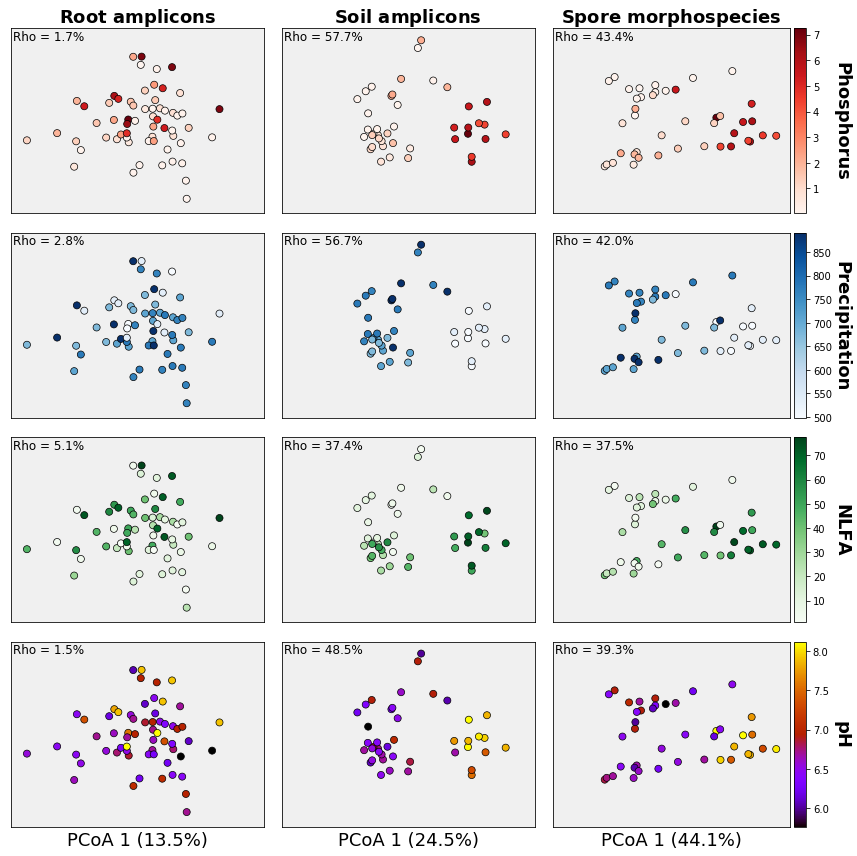

In [21]:
### BRAY-CURTIS

figsize = (12,12) # same ratio, bigger text
fig, ((ax11, ax12, ax13),(ax21, ax22, ax23),(ax31, ax32, ax33),(ax41, ax42, ax43)) = plt.subplots(4, 3, figsize=figsize, sharex=True, sharey=True)

####### Soil
ord_results = bc_pc_Ill_roots
dm = dm_roots
df = test_df_roots
ids = df.index.values
xs = df['PCA1']
ys = df['PCA2']
####### Axis 1,1
ax11.set_facecolor('#f0f0f0')
column = 'New_P'
# Choose colormap
color_map = pl.cm.Reds

anno_text = ''

plot = ax11.scatter(xs, ys, c=np.abs(df[column]), cmap=color_map, s = 50, edgecolors = 'black', linewidth=0.69)

ax11.annotate(anno_text + 'Rho = %.1f%%' % (bioenv(dm, df[[column]])['correlation'][0]*100),
              size=12,xy=(0.01,0.99), xycoords='axes fraction',horizontalalignment='left', verticalalignment='top')
ax11.set_xticklabels([])
ax11.set_yticklabels([])
ax11.margins(0.05)
ax11.grid(False)
plt.tight_layout()

####### Axis 2,1
ax21.set_facecolor('#f0f0f0')
column = 'Rainfall'
# Choose colormap
color_map = pl.cm.Blues

anno_text = ''

plot = ax21.scatter(xs, ys, c=np.abs(df[column]), cmap=color_map, s = 50, 
                      edgecolors = 'black', linewidth=0.69)

ax21.annotate(anno_text + 'Rho = %.1f%%' % (bioenv(dm, df[[column]])['correlation'][0]*100),
              size=12,xy=(0.01,0.99), xycoords='axes fraction',horizontalalignment='left', verticalalignment='top')
ax21.set_xticklabels([])
ax21.set_yticklabels([])
ax21.margins(0.05)
ax21.grid(False)
plt.tight_layout()

####### Axis 3,1
ax31.set_facecolor('#f0f0f0')
column = 'AMF_NLFA'
# Choose colormap
color_map = pl.cm.Greens

anno_text = ''

plot = ax31.scatter(xs, ys, c=np.abs(df[column]), cmap=color_map, s = 50, edgecolors = 'black', linewidth=0.69)

ax31.annotate(anno_text + 'Rho = %.1f%%' % (bioenv(dm, df[[column]])['correlation'][0]*100), 
              size=12,xy=(0.01,0.99), xycoords='axes fraction',horizontalalignment='left', verticalalignment='top')
ax31.set_xticklabels([])
ax31.set_yticklabels([])
ax31.margins(0.05)
ax31.grid(False)
plt.tight_layout()

####### Axis 3,1
ax41.set_facecolor('#f0f0f0')
column = 'pH_H2O'
# Choose colormap
color_map = pl.cm.gnuplot

anno_text = ''

plot = ax41.scatter(xs, ys, c=np.abs(df[column]), cmap=color_map, s = 50, edgecolors = 'black', linewidth=0.69)

ax41.annotate(anno_text + 'Rho = %.1f%%' % (bioenv(dm, df[[column]])['correlation'][0]*100),
              size=12,xy=(0.01,0.99), xycoords='axes fraction',horizontalalignment='left', verticalalignment='top')
ax41.set_xlabel('PCoA %d (%.1f%%)' % (1, ord_results.proportion_explained[0]*100), size=18)
ax41.set_xticklabels([])
ax41.set_yticklabels([])
ax41.margins(0.05)
ax41.grid(False)
plt.tight_layout()

####### Roots
ord_results = bc_pc_Ill_soil
dm = dm_soil
df = test_df_soil
ids = df.index.values
xs = df['PCA1']
ys = df['PCA2']
####### Axis 1,2
ax12.set_facecolor('#f0f0f0')
column = 'New_P'
# Choose colormap
color_map = pl.cm.Reds

anno_text = ''

plot = ax12.scatter(xs, ys, c=np.abs(df[column]), cmap=color_map, s = 50, edgecolors = 'black', linewidth=0.69)

ax12.annotate(anno_text + 'Rho = %.1f%%' % (bioenv(dm, df[[column]])['correlation'][0]*100),
              size=12,xy=(0.01,0.99), xycoords='axes fraction',horizontalalignment='left', verticalalignment='top')

ax12.set_xticklabels([])
ax12.set_yticklabels([])
ax12.margins(0.05)
ax12.grid(False)
plt.tight_layout()

####### Axis 2,2
ax22.set_facecolor('#f0f0f0')
column = 'Rainfall'
# Choose colormap
color_map = pl.cm.Blues

anno_text = ''

plot = ax22.scatter(xs, ys, c=np.abs(df[column]), cmap=color_map, s = 50, 
                      edgecolors = 'black', linewidth=0.69)

ax22.annotate(anno_text + 'Rho = %.1f%%' % (bioenv(dm, df[[column]])['correlation'][0]*100),
              size=12,xy=(0.01,0.99), xycoords='axes fraction',horizontalalignment='left', verticalalignment='top')

ax22.set_xticklabels([])
ax22.set_yticklabels([])
ax22.margins(0.05)
ax22.grid(False)
plt.tight_layout()

####### Axis 3,2
ax32.set_facecolor('#f0f0f0')
column = 'AMF_NLFA'
# Choose colormap
color_map = pl.cm.Greens

anno_text = ''

plot = ax32.scatter(xs, ys, c=np.abs(df[column]), cmap=color_map, s = 50, edgecolors = 'black', linewidth=0.69)

ax32.annotate(anno_text + 'Rho = %.1f%%' % (bioenv(dm, df[[column]])['correlation'][0]*100), 
              size=12,xy=(0.01,0.99), xycoords='axes fraction',horizontalalignment='left', verticalalignment='top')

ax32.set_xticklabels([])
ax32.set_yticklabels([])
ax32.margins(0.05)
ax32.grid(False)
plt.tight_layout()

####### Axis 4,2
ax42.set_facecolor('#f0f0f0')
column = 'pH_H2O'
# Choose colormap
color_map = pl.cm.gnuplot

anno_text = ''

plot = ax42.scatter(xs, ys, c=np.abs(df[column]), cmap=color_map, s = 50, edgecolors = 'black', linewidth=0.69)

ax42.annotate(anno_text + 'Rho = %.1f%%' % (bioenv(dm, df[[column]])['correlation'][0]*100),
              size=12,xy=(0.01,0.99), xycoords='axes fraction',horizontalalignment='left', verticalalignment='top')
ax42.set_xlabel('PCoA %d (%.1f%%)' % (1, ord_results.proportion_explained[0]*100), size=18)
ax42.set_xticklabels([])
ax42.set_yticklabels([])
ax42.margins(0.05)
ax42.grid(False)
plt.tight_layout()

####### Spores
ord_results = bc_pc_Ill_spores
dm = dm_spores
df = test_df_spores
ids = df.index.values
xs = df['PCA1']
ys = df['PCA2']
####### Axis 1,3
ax13.set_facecolor('#f0f0f0')
column = 'New_P'
# Choose colormap
color_map = pl.cm.Reds

anno_text = ''

plot = ax13.scatter(xs, ys, c=np.abs(df[column]), cmap=color_map, s = 50, edgecolors = 'black', linewidth=0.69)

ax13.annotate(anno_text + 'Rho = %.1f%%' % (bioenv(dm, df[[column]])['correlation'][0]*100),
              size=12,xy=(0.01,0.99), xycoords='axes fraction',horizontalalignment='left', verticalalignment='top')

ax13.set_xticklabels([])
ax13.set_yticklabels([])
ax13.margins(0.05)
ax13.grid(False)
divider = make_axes_locatable(ax13)
cax = divider.append_axes("right", size="5%", pad=0.05)
fig.colorbar(plot, cax=cax)
plt.tight_layout()
####### Axis 2,3
ax23.set_facecolor('#f0f0f0')
column = 'Rainfall'
# Choose colormap
color_map = pl.cm.Blues

anno_text = ''

plot = ax23.scatter(xs, ys, c=np.abs(df[column]), cmap=color_map, s = 50, 
                      edgecolors = 'black', linewidth=0.69)

ax23.annotate(anno_text + 'Rho = %.1f%%' % (bioenv(dm, df[[column]])['correlation'][0]*100),
              size=12,xy=(0.01,0.99), xycoords='axes fraction',horizontalalignment='left', verticalalignment='top')

ax23.set_xticklabels([])
ax23.set_yticklabels([])
ax23.margins(0.05)
ax23.grid(False)
divider = make_axes_locatable(ax23)
cax = divider.append_axes("right", size="5%", pad=0.05)
fig.colorbar(plot, cax=cax)
plt.tight_layout()
####### Axis 3,3
ax33.set_facecolor('#f0f0f0')
column = 'AMF_NLFA'
# Choose colormap
color_map = pl.cm.Greens

anno_text = ''

plot = ax33.scatter(xs, ys, c=np.abs(df[column]), cmap=color_map, s = 50, edgecolors = 'black', linewidth=0.69)

ax33.annotate(anno_text + 'Rho = %.1f%%' % (bioenv(dm, df[[column]])['correlation'][0]*100), 
              size=12,xy=(0.01,0.99), xycoords='axes fraction',horizontalalignment='left', verticalalignment='top')

ax33.set_xticklabels([])
ax33.set_yticklabels([])
ax33.margins(0.05)
ax33.grid(False)
divider = make_axes_locatable(ax33)
cax = divider.append_axes("right", size="5%", pad=0.05)
fig.colorbar(plot, cax=cax)
plt.tight_layout()
####### Axis 4,3
ax43.set_facecolor('#f0f0f0')
column = 'pH_H2O'
# Choose colormap
color_map = pl.cm.gnuplot

anno_text = ''

plot = ax43.scatter(xs, ys, c=np.abs(df[column]), cmap=color_map, s = 50, edgecolors = 'black', linewidth=0.69)

ax43.annotate(anno_text + 'Rho = %.1f%%' % (bioenv(dm, df[[column]])['correlation'][0]*100),
              size=12,xy=(0.01,0.99), xycoords='axes fraction',horizontalalignment='left', verticalalignment='top')
ax43.set_xlabel('PCoA %d (%.1f%%)' % (1, ord_results.proportion_explained[0]*100), size=18)
ax43.set_xticklabels([])
ax43.set_yticklabels([])
ax43.margins(0.05)
ax43.grid(False)

divider = make_axes_locatable(ax43)
cax = divider.append_axes("right", size="5%", pad=0.05)
fig.colorbar(plot, cax=cax)
plt.tight_layout()
###### Saving
plt.subplots_adjust(hspace = 0.1, wspace = 0.02)
for ax in [ax11, ax12, ax13,ax21, ax22, ax23,ax31, ax32, ax33,ax41, ax42, ax43]:
    ax.set_xticks([])
    ax.set_yticks([])
cols = ['Root\ amplicons','Soil\ amplicons','Spore\ morphospecies']
# scores = ['PCoA %d (%.1f%%)' % (2, bc_pc_Ill_roots.proportion_explained[1]*100), 'PCoA %d (%.1f%%)' % (2, bc_pc_Ill_soil.proportion_explained[1]*100), 'PCoA %d (%.1f%%)' % (2, bc_pc_Ill_spores.proportion_explained[1]*100)]
# for ax, col, score in zip([ax11,ax12,ax13], cols, scores):
#     ax.set_title(r'$\bf{' + col + '}$' + '\n' + score, size=18)
for ax, col in zip([ax11,ax12,ax13], cols):
    ax.set_title(r'$\bf{' + col + '}$', size=18)
rows = ['Phosphorus', 'Precipitation', 'NLFA', 'pH']
for ax, row in zip([ax13,ax23,ax33,ax43], rows):
    current_label = ax.xaxis.get_label()
    ax.set_ylabel(row, size=18,rotation=-90, weight = 'bold', labelpad = 60)
    ax.yaxis.set_label_position('right')
plt.tight_layout()

filename = 'output/all_pcoas_nlfa.jpg'
plt.savefig(filename, dpi = 500, format = 'jpg')

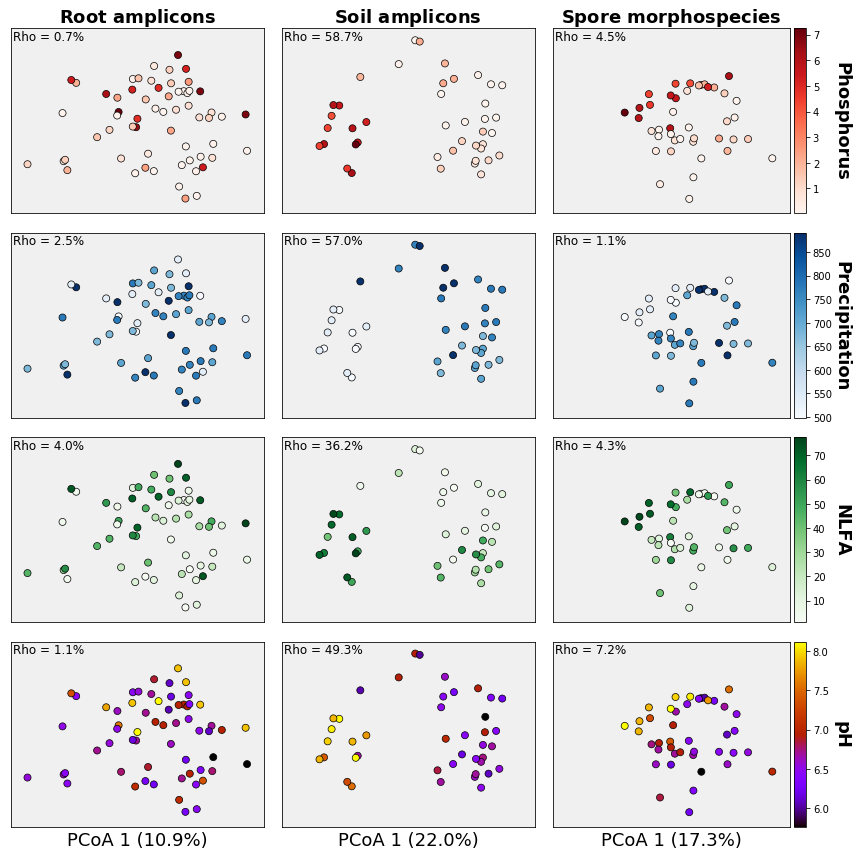

In [22]:
### JACCARD

figsize = (12,12) # same ratio, bigger text
fig, ((ax11, ax12, ax13),(ax21, ax22, ax23),(ax31, ax32, ax33),(ax41, ax42, ax43)) = plt.subplots(4, 3, figsize=figsize, sharex=True, sharey=True)

####### Soil
ord_results = bc_pc_Ill_roots_j
dm = dm_roots_j
df = test_df_roots
ids = df.index.values
xs = df['PCA1_j']
ys = df['PCA2_j']
####### Axis 1,1
ax11.set_facecolor('#f0f0f0')
column = 'New_P'
# Choose colormap
color_map = pl.cm.Reds

anno_text = ''

plot = ax11.scatter(xs, ys, c=np.abs(df[column]), cmap=color_map, s = 50, edgecolors = 'black', linewidth=0.69)

ax11.annotate(anno_text + 'Rho = %.1f%%' % (bioenv(dm, df[[column]])['correlation'][0]*100),
              size = 12,xy=(0.01,0.99), xycoords='axes fraction',horizontalalignment='left', verticalalignment='top')
ax11.set_xticklabels([])
ax11.set_yticklabels([])
ax11.margins(0.05)
ax11.grid(False)
plt.tight_layout()

####### Axis 2,1
ax21.set_facecolor('#f0f0f0')
column = 'Rainfall'
# Choose colormap
color_map = pl.cm.Blues

anno_text = ''

plot = ax21.scatter(xs, ys, c=np.abs(df[column]), cmap=color_map, s = 50, 
                      edgecolors = 'black', linewidth=0.69)

ax21.annotate(anno_text + 'Rho = %.1f%%' % (bioenv(dm, df[[column]])['correlation'][0]*100),
              size = 12,xy=(0.01,0.99), xycoords='axes fraction',horizontalalignment='left', verticalalignment='top')
ax21.set_xticklabels([])
ax21.set_yticklabels([])
ax21.margins(0.05)
ax21.grid(False)
plt.tight_layout()

####### Axis 3,1
ax31.set_facecolor('#f0f0f0')
column = 'AMF_NLFA'
# Choose colormap
color_map = pl.cm.Greens

anno_text = ''

plot = ax31.scatter(xs, ys, c=np.abs(df[column]), cmap=color_map, s = 50, edgecolors = 'black', linewidth=0.69)

ax31.annotate(anno_text + 'Rho = %.1f%%' % (bioenv(dm, df[[column]])['correlation'][0]*100), 
              size = 12,xy=(0.01,0.99), xycoords='axes fraction',horizontalalignment='left', verticalalignment='top')
ax31.set_xticklabels([])
ax31.set_yticklabels([])
ax31.margins(0.05)
ax31.grid(False)
plt.tight_layout()

####### Axis 3,1
ax41.set_facecolor('#f0f0f0')
column = 'pH_H2O'
# Choose colormap
color_map = pl.cm.gnuplot

anno_text = ''

plot = ax41.scatter(xs, ys, c=np.abs(df[column]), cmap=color_map, s = 50, edgecolors = 'black', linewidth=0.69)

ax41.annotate(anno_text + 'Rho = %.1f%%' % (bioenv(dm, df[[column]])['correlation'][0]*100),
              size = 12,xy=(0.01,0.99), xycoords='axes fraction',horizontalalignment='left', verticalalignment='top')
ax41.set_xlabel('PCoA %d (%.1f%%)' % (1, ord_results.proportion_explained[0]*100), size=18)
ax41.set_xticklabels([])
ax41.set_yticklabels([])
ax41.margins(0.05)
ax41.grid(False)
plt.tight_layout()

####### Roots
ord_results = bc_pc_Ill_soil_j
dm = dm_soil_j
df = test_df_soil
ids = df.index.values
xs = df['PCA1_j']
ys = df['PCA2_j']
####### Axis 1,2
ax12.set_facecolor('#f0f0f0')
column = 'New_P'
# Choose colormap
color_map = pl.cm.Reds

anno_text = ''

plot = ax12.scatter(xs, ys, c=np.abs(df[column]), cmap=color_map, s = 50, edgecolors = 'black', linewidth=0.69)

ax12.annotate(anno_text + 'Rho = %.1f%%' % (bioenv(dm, df[[column]])['correlation'][0]*100),
              size = 12,xy=(0.01,0.99), xycoords='axes fraction',horizontalalignment='left', verticalalignment='top')

ax12.set_xticklabels([])
ax12.set_yticklabels([])
ax12.margins(0.05)
ax12.grid(False)
plt.tight_layout()

####### Axis 2,2
ax22.set_facecolor('#f0f0f0')
column = 'Rainfall'
# Choose colormap
color_map = pl.cm.Blues

anno_text = ''

plot = ax22.scatter(xs, ys, c=np.abs(df[column]), cmap=color_map, s = 50, 
                      edgecolors = 'black', linewidth=0.69)

ax22.annotate(anno_text + 'Rho = %.1f%%' % (bioenv(dm, df[[column]])['correlation'][0]*100),
              size = 12,xy=(0.01,0.99), xycoords='axes fraction',horizontalalignment='left', verticalalignment='top')

ax22.set_xticklabels([])
ax22.set_yticklabels([])
ax22.margins(0.05)
ax22.grid(False)
plt.tight_layout()

####### Axis 3,2
ax32.set_facecolor('#f0f0f0')
column = 'AMF_NLFA'
# Choose colormap
color_map = pl.cm.Greens

anno_text = ''

plot = ax32.scatter(xs, ys, c=np.abs(df[column]), cmap=color_map, s = 50, edgecolors = 'black', linewidth=0.69)

ax32.annotate(anno_text + 'Rho = %.1f%%' % (bioenv(dm, df[[column]])['correlation'][0]*100), 
              size = 12,xy=(0.01,0.99), xycoords='axes fraction',horizontalalignment='left', verticalalignment='top')

ax32.set_xticklabels([])
ax32.set_yticklabels([])
ax32.margins(0.05)
ax32.grid(False)
plt.tight_layout()

####### Axis 4,2
ax42.set_facecolor('#f0f0f0')
column = 'pH_H2O'
# Choose colormap
color_map = pl.cm.gnuplot

anno_text = ''

plot = ax42.scatter(xs, ys, c=np.abs(df[column]), cmap=color_map, s = 50, edgecolors = 'black', linewidth=0.69)

ax42.annotate(anno_text + 'Rho = %.1f%%' % (bioenv(dm, df[[column]])['correlation'][0]*100),
              size = 12,xy=(0.01,0.99), xycoords='axes fraction',horizontalalignment='left', verticalalignment='top')
ax42.set_xlabel('PCoA %d (%.1f%%)' % (1, ord_results.proportion_explained[0]*100), size=18)
ax42.set_xticklabels([])
ax42.set_yticklabels([])
ax42.margins(0.05)
ax42.grid(False)
plt.tight_layout()

####### Spores
ord_results = bc_pc_Ill_spores_j
dm = dm_spores_j
df = test_df_spores
ids = df.index.values
xs = df['PCA1_j']
ys = df['PCA2_j']
####### Axis 1,3
ax13.set_facecolor('#f0f0f0')
column = 'New_P'
# Choose colormap
color_map = pl.cm.Reds

anno_text = ''

plot = ax13.scatter(xs, ys, c=np.abs(df[column]), cmap=color_map, s = 50, edgecolors = 'black', linewidth=0.69)

ax13.annotate(anno_text + 'Rho = %.1f%%' % (bioenv(dm, df[[column]])['correlation'][0]*100),
              size = 12,xy=(0.01,0.99), xycoords='axes fraction',horizontalalignment='left', verticalalignment='top')

ax13.set_xticklabels([])
ax13.set_yticklabels([])
ax13.margins(0.05)
ax13.grid(False)
divider = make_axes_locatable(ax13)
cax = divider.append_axes("right", size="5%", pad=0.05)
fig.colorbar(plot, cax=cax)
plt.tight_layout()
####### Axis 2,3
ax23.set_facecolor('#f0f0f0')
column = 'Rainfall'
# Choose colormap
color_map = pl.cm.Blues

anno_text = ''

plot = ax23.scatter(xs, ys, c=np.abs(df[column]), cmap=color_map, s = 50, 
                      edgecolors = 'black', linewidth=0.69)

ax23.annotate(anno_text + 'Rho = %.1f%%' % (bioenv(dm, df[[column]])['correlation'][0]*100),
              size = 12,xy=(0.01,0.99), xycoords='axes fraction',horizontalalignment='left', verticalalignment='top')

ax23.set_xticklabels([])
ax23.set_yticklabels([])
ax23.margins(0.05)
ax23.grid(False)
divider = make_axes_locatable(ax23)
cax = divider.append_axes("right", size="5%", pad=0.05)
fig.colorbar(plot, cax=cax)
plt.tight_layout()
####### Axis 3,3
ax33.set_facecolor('#f0f0f0')
column = 'AMF_NLFA'
# Choose colormap
color_map = pl.cm.Greens

anno_text = ''

plot = ax33.scatter(xs, ys, c=np.abs(df[column]), cmap=color_map, s = 50, edgecolors = 'black', linewidth=0.69)

ax33.annotate(anno_text + 'Rho = %.1f%%' % (bioenv(dm, df[[column]])['correlation'][0]*100), 
              size = 12,xy=(0.01,0.99), xycoords='axes fraction',horizontalalignment='left', verticalalignment='top')

ax33.set_xticklabels([])
ax33.set_yticklabels([])
ax33.margins(0.05)
ax33.grid(False)
divider = make_axes_locatable(ax33)
cax = divider.append_axes("right", size="5%", pad=0.05)
fig.colorbar(plot, cax=cax)
plt.tight_layout()
####### Axis 4,3
ax43.set_facecolor('#f0f0f0')
column = 'pH_H2O'
# Choose colormap
color_map = pl.cm.gnuplot

anno_text = ''

plot = ax43.scatter(xs, ys, c=np.abs(df[column]), cmap=color_map, s = 50, edgecolors = 'black', linewidth=0.69)

ax43.annotate(anno_text + 'Rho = %.1f%%' % (bioenv(dm, df[[column]])['correlation'][0]*100),
              size = 12,xy=(0.01,0.99), xycoords='axes fraction',horizontalalignment='left', verticalalignment='top')
ax43.set_xlabel('PCoA %d (%.1f%%)' % (1, ord_results.proportion_explained[0]*100), size=18)
ax43.set_xticklabels([])
ax43.set_yticklabels([])
ax43.margins(0.05)
ax43.grid(False)

divider = make_axes_locatable(ax43)
cax = divider.append_axes("right", size="5%", pad=0.05)
fig.colorbar(plot, cax=cax)
plt.tight_layout()
###### Saving
plt.subplots_adjust(hspace = 0.1, wspace = 0.02)
for ax in [ax11, ax12, ax13,ax21, ax22, ax23,ax31, ax32, ax33,ax41, ax42, ax43]:
    ax.set_xticks([])
    ax.set_yticks([])
cols = ['Root\ amplicons','Soil\ amplicons','Spore\ morphospecies']
# scores = ['PCoA %d (%.1f%%)' % (2, bc_pc_Ill_roots_j.proportion_explained[1]*100), 'PCoA %d (%.1f%%)' % (2, bc_pc_Ill_soil_j.proportion_explained[1]*100), 'PCoA %d (%.1f%%)' % (2, bc_pc_Ill_spores_j.proportion_explained[1]*100)]
# for ax, col, score in zip([ax11,ax12,ax13], cols, scores):
#     ax.set_title(r'$\bf{' + col + '}$' + '\n' + score, size = 18)
for ax, col in zip([ax11,ax12,ax13], cols):
    ax.set_title(r'$\bf{' + col + '}$', size = 18)
rows = ['Phosphorus', 'Precipitation', 'NLFA', 'pH']

for ax, row in zip([ax13,ax23,ax33,ax43], rows):
    current_label = ax.xaxis.get_label()
    ax.set_ylabel(row, rotation=-90, weight = 'bold', size = 18, labelpad = 60)
    ax.yaxis.set_label_position('right')
plt.tight_layout()

filename = 'output/all_pcoas_nlfa_j.jpg'
plt.savefig(filename, dpi = 500, format = 'jpg')

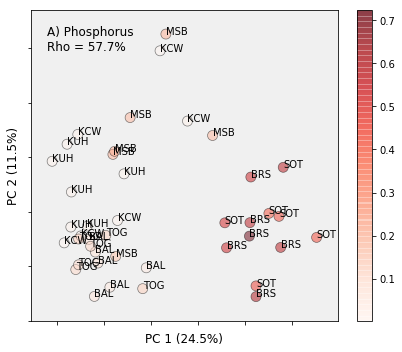

In [14]:
pc = bc_pc_Ill_soil
dm = dm_soil
df = test_df_soil
ax = scatter_2d(pc, df, dm, 'New_P', 'Reds', annotate = True)

In [18]:
test_df_roots.shape

(61, 38)

In [15]:
study_perm = permanova(DistanceMatrix(dm_df_full), map_df_full['Study'].values, permutations=999)
study_perm

method name               PERMANOVA
test statistic name        pseudo-F
sample size                     103
number of groups                  2
test statistic              19.2266
p-value                       0.001
number of permutations          999
Name: PERMANOVA results, dtype: object

In [20]:
study_perm_j = permanova(DistanceMatrix(dm_df_j_full), map_df_full['Study'].values, permutations=999)
study_perm_j

method name               PERMANOVA
test statistic name        pseudo-F
sample size                     103
number of groups                  2
test statistic              14.0832
p-value                       0.001
number of permutations          999
Name: PERMANOVA results, dtype: object

In [21]:
p_perm = permanova(DistanceMatrix(dm_roots), map_df_root['Plant_Species'].values, permutations=999)
p_perm

method name               PERMANOVA
test statistic name        pseudo-F
sample size                      61
number of groups                  2
test statistic              1.21314
p-value                       0.251
number of permutations          999
Name: PERMANOVA results, dtype: object

In [22]:
gr_perm = permanova(DistanceMatrix(dm_roots), map_df_root['Graztrt'].values, permutations=999)
gr_perm

method name               PERMANOVA
test statistic name        pseudo-F
sample size                      61
number of groups                  2
test statistic              1.46147
p-value                         0.1
number of permutations          999
Name: PERMANOVA results, dtype: object

In [23]:
gs_perm = permanova(DistanceMatrix(dm_soil), map_df_soil['Graztrt'].values, permutations=999)
gs_perm

method name               PERMANOVA
test statistic name        pseudo-F
sample size                      42
number of groups                  2
test statistic             0.913444
p-value                        0.49
number of permutations          999
Name: PERMANOVA results, dtype: object

In [24]:
cat_list = ['New_P', 'SOM_2012', 'Rainfall', 'pH_H2O']
for i in range(len(cat_list)):
    print bioenv(DistanceMatrix(dm_soil), pd.DataFrame(map_df_soil[cat_list[i]]))

       size  correlation
vars                    
New_P     1     0.576603
          size  correlation
vars                       
SOM_2012     1     0.331619
          size  correlation
vars                       
Rainfall     1     0.567026
        size  correlation
vars                     
pH_H2O     1     0.484992


In [25]:
cat_list = ['New_P', 'SOM_2012', 'Rainfall', 'pH_H2O']
for i in range(len(cat_list)):
    print bioenv(DistanceMatrix(dm_soil_j), pd.DataFrame(map_df_soil[cat_list[i]]))

       size  correlation
vars                    
New_P     1     0.587311
          size  correlation
vars                       
SOM_2012     1     0.319574
          size  correlation
vars                       
Rainfall     1     0.570263
        size  correlation
vars                     
pH_H2O     1     0.493347


In [26]:
print len(list(soil_names))
print len(list(root_names))
print len(list(map_df_root.index))

42
61
61


In [27]:
spores_table = pd.read_csv('/home/ignorantiam/Documents/complete_AM_analysis_71817/Spores/spore_table_samples_new_taxonomy_glomus_names.csv', index_col=0).T

spores_table['Richness'] = spores_table.astype(bool).sum(axis=1)
spores_table['Study'] = 'Spores'
del spores_table.index.name
spores_table[:5]

Species ID,Acaulospora hyaline golf ball,Acaulospora laevis,Acaulospora scrobiculata,Acaulospora small red,Acaulospora small thin yellow,Acaulospora sp,Acaulospora spiky white and orange,Acaulospora tiny yellow spine,Archaeospora trappei,Cetraspora pellucida,...,Glomus sinuosum like tiny,Glomus sp,Glomus tiny sclero like,Scutellospora calospora,Scutellospora scuttata,Scutellospora sp,Glomus constrictum,Unknown red orange,Richness,Study
BAL1,0.0,0.120318,0.0,32.810681,0.0,0.0,32.810681,0.0,13.367314,0.120318,...,0.0,0.0,0.0,0.120318,0.120318,0.120318,1.215210,49.823626,23,Spores
BAL2,0.0,0.247182,0.0,16.227520,0.0,0.0,31.206770,0.0,11.234437,0.123591,...,0.0,0.0,0.0,0.000000,0.123591,0.123591,2.496542,11.234437,19,Spores
BAL3,0.0,0.000000,0.0,9.890877,0.0,0.0,13.599956,0.0,8.654518,0.000000,...,0.0,0.0,0.0,0.000000,0.000000,0.000000,0.000000,3.709079,15,Spores
BAL4,0.0,0.000000,0.0,27.726077,0.0,0.0,27.726077,0.0,12.602762,0.000000,...,0.0,0.0,0.0,0.000000,0.000000,0.000000,0.000000,10.082210,15,Spores
BAL5,0.0,0.000000,0.0,43.453548,0.0,0.0,26.554946,0.0,8.449301,0.000000,...,0.0,0.0,0.0,0.000000,0.000000,0.000000,3.621129,19.312688,15,Spores


In [28]:
#97% similarity, 1e-50
# otu_table_original = pd.read_csv('../005_table_97_10000_n2_s1_CSS_AM.txt', 
#                         sep='\t',index_col=0, header=1)
#90% similarity, 1e-3
otu_table_original = pd.read_csv('../005_table_1000_AM_n2_s1_CSS.txt', 
                        sep='\t',index_col=0, header=1)
otu_table = otu_table_original.groupby('taxonomy').sum().T
otu_table = otu_table.filter(list(soil_names) + list(root_names), axis=0)
otu_table.to_csv('../VT_OTU_table.csv')
otu_table2 = otu_table.copy()
otu_table2['Study'] = ['Roots' if len(x) > 5 else 'Soil' for x in otu_table.index]
rich_table = pd.DataFrame(otu_table2.astype(bool).sum(axis=1), columns=['Richness'])
rich_table['Study'] = ['Roots' if len(x) > 5 else 'Soil' for x in rich_table.index]
rich_table = pd.concat([rich_table, spores_table[['Richness', 'Study']]], axis=0)
rich_table['Site'] = [x[:3] for x in rich_table.index]
# rich_table = pd.concat([rich_table, map_df_full['New_P']], axis = 1).dropna()

print rich_table.shape
print set(rich_table['Study'])
rich_table[:5]

(145, 3)
set(['Spores', 'Soil', 'Roots'])


Species ID,Richness,Study,Site
BAL1,15,Soil,BAL
BAL2,19,Soil,BAL
BAL3,20,Soil,BAL
BAL4,21,Soil,BAL
BAL5,20,Soil,BAL


In [29]:
name_list = [x.split('g__')[1] for x in otu_table2.columns[:-1]]
name_list = [x.replace(' ', '').replace('s_', '').replace(';', '') for x in name_list]
name_list.append('Study')

In [30]:
# otu_table2.columns = name_list
otu_table2.index = otu_table.index

In [31]:
otu_table2[otu_table2['Study'] == 'Soil'].drop('Study', 1).to_csv('../indic_species_soil.csv')
otu_table2[otu_table2['Study'] == 'Roots'].drop('Study', 1).to_csv('../indic_species_root.csv')

In [32]:
# tmp_testing_full = pd.concat([rich_table, map_df_full['Graztrt']], axis=1, join_axes=[map_df_full.index])

In [33]:
# sns.factorplot('Site', 'Richness', hue = 'Graztrt', col = 'Study', data=tmp_testing_full,
#               order = ['KUH','KCW','BAL','TOG','SOT','BRS'])

In [34]:
rich_table.groupby('Study').mean()

Species ID,Richness
Study,
Roots,13.049180
Soil,18.238095
Spores,16.904762


In [35]:
rich_table.groupby('Study').std()

Species ID,Richness
Study,
Roots,3.546953
Soil,3.206773
Spores,2.387054


In [36]:
len(otu_table2.T.groupby(otu_table2.columns.values).sum().index.values)

39

In [37]:
pd.DataFrame(otu_table2.groupby('Study').sum().astype(bool).sum(axis=1), columns=['Richness'])

,Richness
Study,
Roots,35
Soil,38


In [38]:
stats.ttest_ind(rich_table[rich_table['Study'] == 'Soil']['Richness'],rich_table[rich_table['Study'] == 'Roots']['Richness'])

Ttest_indResult(statistic=7.582588355888218, pvalue=1.694840425122793e-11)

In [39]:
stats.ttest_ind(rich_table[rich_table['Study'] == 'Soil']['Richness'],rich_table[rich_table['Study'] == 'Spores']['Richness'])

Ttest_indResult(statistic=2.161502492077168, pvalue=0.03357241407330298)

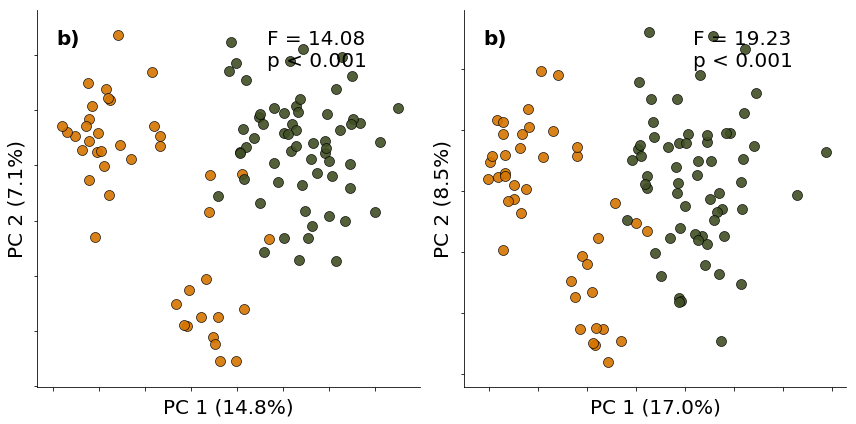

In [40]:
figsize = (12,6) # same ratio, bigger text
fig, (ax1, ax2) = plt.subplots(ncols=2,figsize=figsize)#facecolor='.9'

# ax1.set_axis_bgcolor('#FFFFFF')
# ax2.set_axis_bgcolor('#FFFFFF')

colors = ['#722192','#404F24', '#D57500'][::-1]
labels = ['Soil', 'Roots', 'Spores']
x = test_df_full['PCA1']
y = test_df_full['PCA2']
study = ['Soil', 'Roots', 'Spores']
uniq = list(set(test_df_full['Study']))

for i in range(len(study)):
    sns.regplot('PCA1_j', 'PCA2_j', data = test_df_full[test_df_full['Study'] == study[i]], fit_reg=False,
                color = colors[i], ax = ax1,
                 scatter_kws = {'alpha':0.9,'edgecolors':'black', 'linewidth':0.69, 's':100})

ax1.set_xlabel('PC %d (%.1f%%)' % (1, bc_pc_Ill_full_j.proportion_explained[0]*100), size=20)
ax1.set_ylabel('PC %d (%.1f%%)' % (2, bc_pc_Ill_full_j.proportion_explained[1]*100), size=20)
ax1.annotate('F = ' + str(round(study_perm_j[4], 2)) + '\n' + 'p < ' + str(study_perm_j[5]),
            xy=(0.6, 0.95), xycoords='axes fraction',
            horizontalalignment='left', verticalalignment='top', size=20)

ax1.annotate('b)',xy=(0.05, 0.95), xycoords='axes fraction',
                horizontalalignment='left', verticalalignment='top', size=20, fontweight = 'bold')
ax1.set_xticklabels([])
sns.despine(ax=ax1)
ax1.set_yticklabels([])
ax1.grid(False)
plt.tight_layout()

for i in range(len(study)):
    sns.regplot('PCA1', 'PCA2', data = test_df_full[test_df_full['Study'] == study[i]], fit_reg=False,
                color = colors[i], ax = ax2,
                 scatter_kws = {'alpha':0.9,'edgecolors':'black', 'linewidth':0.69, 's':100})

ax2.set_xlabel('PC %d (%.1f%%)' % (1, bc_pc_Ill_full.proportion_explained[0]*100), size=20)
ax2.set_ylabel('PC %d (%.1f%%)' % (2, bc_pc_Ill_full.proportion_explained[1]*100), size=20)
ax2.annotate('F = ' + str(round(study_perm[4], 2)) + '\n' + 'p < ' + str(study_perm[5]),
            xy=(0.6, 0.95), xycoords='axes fraction',
            horizontalalignment='left', verticalalignment='top', size=20)

ax2.annotate('b)',xy=(0.05, 0.95), xycoords='axes fraction',
                horizontalalignment='left', verticalalignment='top', size=20, fontweight = 'bold')
ax2.set_xticklabels([])
sns.despine(ax=ax2)
ax2.set_yticklabels([])
ax2.grid(False)
plt.tight_layout()
# plt.savefig('output/diversity_bar_pcoa.png', dpi =500)

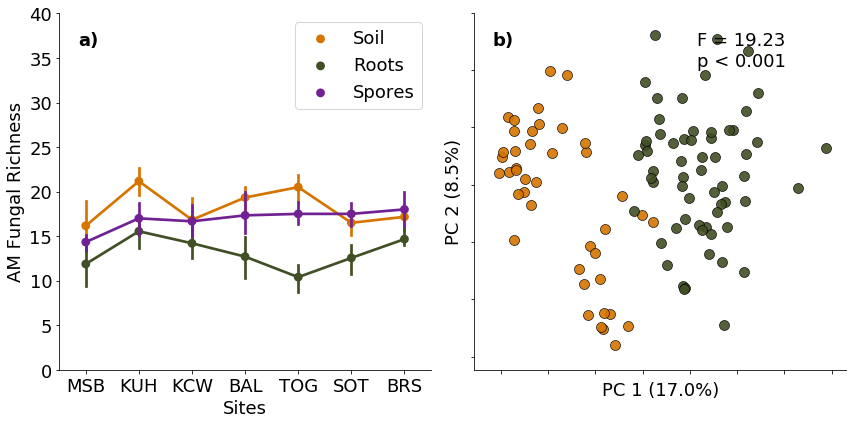

In [41]:
figsize = (12,6) # same ratio, bigger text
fig, (ax1, ax2) = plt.subplots(ncols=2,figsize=figsize)#facecolor='.9'

# params = {'axes.labelsize': 18,'axes.titlesize':18, 'text.fontsize': 14, 
#            'legend.fontsize': 18, 'xtick.labelsize': 18, 'ytick.labelsize': 18}

# rcParams.update(params)

# ax1.set_axis_bgcolor('#FFFFFF')
# ax2.set_axis_bgcolor('#FFFFFF')

colors = ['#722192','#404F24', '#D57500'][::-1]
labels = ['Soil', 'Roots', 'Spores']
x = test_df_full['PCA1']
y = test_df_full['PCA2']
study = ['Soil', 'Roots', 'Spores']
uniq = list(set(test_df_full['Study']))
sns.pointplot('Site','Richness', hue = 'Study', data = rich_table,
                 palette = colors, ax = ax1,
                 order = ['MSB','KUH','KCW','BAL','TOG','SOT','BRS']).set(ylim = (0,40))
sns.despine(ax=ax1)
ax1.set_ylabel('AM Fungal Richness', fontsize = 18)
ax1.set_xlabel('Sites', fontsize = 18)
ax1.tick_params(labelsize = 18)
ax1.legend(loc='upper right', fontsize = 18)
ax1.annotate('a)',xy=(0.05, 0.95), xycoords='axes fraction',
                horizontalalignment='left', verticalalignment='top', size=18, fontweight = 'bold')
for i in range(len(study)):
    sns.regplot('PCA1', 'PCA2', data = test_df_full[test_df_full['Study'] == study[i]], fit_reg=False,
                color = colors[i], ax = ax2,
                 scatter_kws = {'alpha':0.9,'edgecolors':'black', 'linewidth':0.69, 's':100})

ax2.set_xlabel('PC %d (%.1f%%)' % (1, bc_pc_Ill_full.proportion_explained[0]*100), size=18)
ax2.set_ylabel('PC %d (%.1f%%)' % (2, bc_pc_Ill_full.proportion_explained[1]*100), size=18)
ax2.annotate('F = ' + str(round(study_perm[4], 2)) + '\n' + 'p < ' + str(study_perm[5]),
            xy=(0.6, 0.95), xycoords='axes fraction',
            horizontalalignment='left', verticalalignment='top', size=18)

ax2.annotate('b)',xy=(0.05, 0.95), xycoords='axes fraction',
                horizontalalignment='left', verticalalignment='top', size=18, fontweight = 'bold')
ax2.set_xticklabels([])
sns.despine(ax=ax2)
ax2.set_yticklabels([])
ax2.grid(False)
plt.tight_layout()
# plt.savefig('output/diversity_bar_pcoa.png', dpi =500)

In [42]:
#Funneliformis = Glomus, Pacispora = Glomus, Racocetra = Scutellospora, Rhizophagus = Glomus, 
# Sclerocystis = Glomus, Septoglomus = Glomus

In [43]:
rel_otu_table2_spores = spores_table.copy()
rel_otu_table2_spores = rel_otu_table2_spores.drop(['Richness', 'Study'], axis=1)
rel_otu_table2_spores.columns = [x.split(' ')[0] for x in rel_otu_table2_spores.columns.values]
rel_otu_table2_spores = rel_otu_table2_spores.T
rel_otu_table2_spores['genus'] = rel_otu_table2_spores.index.values
rel_otu_table2_spores = rel_otu_table2_spores.groupby('genus').sum().T
rel_otu_table2_spores['Study'] = 'Spores'
rel_otu_table2_spores['Site'] = [x[:3] for x in rel_otu_table2_spores.index]
rel_otu_table2_spores[:5]

genus,Acaulospora,Archaeospora,Cetraspora,Claroideoglomus,Diversispora,Entrophospora,Gigaspora,Glomus,Paraglomus,Scutellospora,Unknown,Study,Site
BAL1,65.741679,13.367314,0.120318,4.860842,0.0,1.215210,2.791374,255.182150,30.861531,0.360954,49.823626,Spores,BAL
BAL2,47.681473,11.234437,0.123591,2.496542,0.0,1.248271,0.123591,192.826942,19.972333,0.247182,11.234437,Spores,BAL
BAL3,23.490833,8.654518,0.000000,1.236360,0.0,3.709079,0.000000,219.031517,22.254474,0.000000,3.709079,Spores,BAL
BAL4,55.452155,12.602762,0.000000,1.260276,0.0,0.000000,0.124780,225.726705,17.643867,0.000000,10.082210,Spores,BAL
BAL5,70.008495,8.449301,0.000000,0.000000,0.0,0.000000,0.119509,307.688410,31.383118,0.000000,19.312688,Spores,BAL


In [44]:
rel_otu_table2 = otu_table2.drop('Study', axis=1)
rel_otu_table2.columns = [x.split('; s__')[0].split('__')[-1] for x in rel_otu_table2.columns.values]
rel_otu_table2 = rel_otu_table2.T
rel_otu_table2['genus'] = rel_otu_table2.index
rel_otu_table2 = rel_otu_table2.groupby('genus', axis=0).sum()
rel_otu_table2 = rel_otu_table2.T
rel_otu_table2['Site'] = [x[:3] for x in rel_otu_table2.index]
rel_otu_table2['Study'] = ['Roots' if len(x) > 5 else 'Soil' for x in rel_otu_table2.index]
rel_otu_table2 = rel_otu_table2.append(rel_otu_table2_spores)
rel_otu_table22 = rel_otu_table2.groupby(['Study','Site']).sum()
rel_otu_table22 = rel_otu_table22.div(rel_otu_table22.sum(axis=1), axis=0).multiply(100)
# rel_otu_table2_i = rel_otu_table2.reset_index()

/home/ignorantiam/anaconda3/envs/py27/lib/python2.7/site-packages/pandas/core/frame.py:6201: FutureWarning: Sorting because non-concatenation axis is not aligned. A future version
of pandas will change to not sort by default.

To accept the future behavior, pass 'sort=True'.

To retain the current behavior and silence the warning, pass sort=False

  sort=sort)


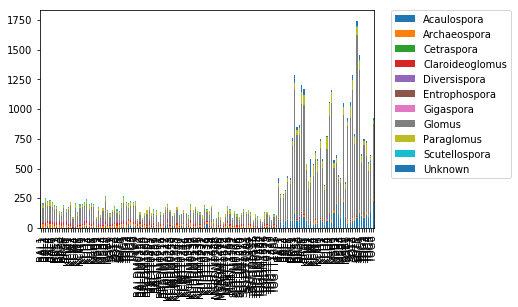

In [45]:
rel_otu_table2.plot(kind='bar', stacked=True)
plt.legend(bbox_to_anchor=(1.05, 1), loc=2, borderaxespad=0)

In [46]:
# g = sns.factorplot(x="Site", y="Glomus", hue="Study", data=rel_otu_table2_i,
#                    size=6, kind="bar", palette="muted")

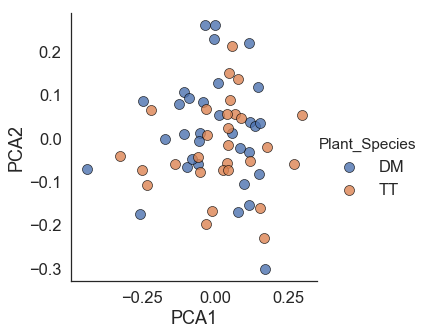

In [47]:
sns.set(style = 'white', font_scale=1.5, rc={"lines.linewidth": 2})
sns.lmplot('PCA1', 'PCA2', hue = 'Plant_Species', data = test_df_roots, fit_reg=False,
          scatter_kws ={'s':100, 'linewidth':0.69, 'edgecolor':'black'})

In [48]:
rel_otu_table_complex = rel_otu_table2.copy()
rel_otu_table_complex = rel_otu_table_complex.loc[:, rel_otu_table_complex.columns != 'Site'].fillna(0)
rel_otu_table_complex.index = rel_otu_table_complex.index + '_' + rel_otu_table_complex['Study']
rel_otu_table_complex = rel_otu_table_complex.loc[:, rel_otu_table_complex.columns != 'Study']
rel_otu_table_complex = rel_otu_table_complex.drop(['Unknown'], axis=1)
rel_otu_table_complex = rel_otu_table_complex.div(rel_otu_table_complex.sum(axis=1), axis=0).multiply(100)

f = open('/home/ignorantiam/Documents/complete_AM_analysis_71817/Spores/total_table.csv', 'a')
f.truncate(0)
f.write('# Constructed from biom file\n')
rel_otu_table_complex.T.to_csv(f, sep = '\t', index_label = '#OTU ID')
f.close
rel_otu_table_complex['Study'] = [x.split('_')[1] for x in rel_otu_table_complex.index]
rel_otu_table_complex['Site'] = [x[:3] for x in rel_otu_table_complex.index]

In [49]:
rel_otu_table_complex[:5]

,Acaulospora,Archaeospora,Cetraspora,Claroideoglomus,Diversispora,Entrophospora,Gigaspora,Glomus,Paraglomus,Scutellospora,Study,Site
Study,,,,,,,,,,,,
BAL1_Soil,0.000000,10.915966,0.0,9.100447,3.373728,0.0,0.0,52.809376,18.755025,5.045457,Soil,BAL
BAL2_Soil,0.000000,16.188004,0.0,5.640785,2.511437,0.0,0.0,54.130927,14.337576,7.191270,Soil,BAL
BAL3_Soil,0.000000,7.312116,0.0,8.333818,4.617714,0.0,0.0,62.568233,13.390074,3.778044,Soil,BAL
BAL4_Soil,5.697178,11.376459,0.0,9.476361,0.000000,0.0,0.0,55.725382,13.988336,3.736285,Soil,BAL
BAL5_Soil,0.000000,15.068384,0.0,9.127792,5.542943,0.0,0.0,49.046281,17.045265,4.169335,Soil,BAL


In [50]:
all_dm_df = pd.read_csv('/home/ignorantiam/Documents/complete_AM_analysis_71817/Spores/bray_curtis_total_table.txt', sep='\t', index_col=0)
all_dm_df.sort_index(inplace=True, axis=1)
all_dm_df.sort_index(inplace=True, axis=0)
all_dm_df[:5]

,BAL1_Soil,BAL1_Spores,BAL2_Soil,BAL2_Spores,BAL3_Soil,BAL3_Spores,BAL4_Soil,BAL4_Spores,BAL5_Soil,BAL5_Spores,...,TOG5_Spores,TOG6_Soil,TOG6_Spores,TOGDM0176_Roots,TOGDM0278_Roots,TOGDM1686_Roots,TOGTT0175_Roots,TOGTT0277_Roots,TOGTT1481_Roots,TOGTT1685_Roots
BAL1_Soil,0.000000,0.395679,0.081661,0.393542,0.108477,0.401816,0.091989,0.399535,0.061964,0.414934,...,0.433089,0.170424,0.429559,0.200629,0.366725,0.380944,0.215612,0.209307,0.227408,0.215981
BAL1_Spores,0.395679,0.000000,0.374317,0.019531,0.295857,0.117990,0.308208,0.025747,0.438651,0.041354,...,0.055293,0.290022,0.059481,0.354065,0.512223,0.529769,0.215456,0.290763,0.249169,0.292472
BAL2_Soil,0.081661,0.374317,0.000000,0.372271,0.121991,0.380569,0.099430,0.378529,0.081799,0.393895,...,0.412463,0.209894,0.409158,0.232886,0.412780,0.428740,0.201844,0.247719,0.217548,0.239521
BAL2_Spores,0.393542,0.019531,0.372271,0.000000,0.294262,0.103296,0.306548,0.014602,0.436297,0.031998,...,0.053115,0.288322,0.056926,0.351868,0.515302,0.526273,0.214228,0.289030,0.247652,0.290847
BAL3_Soil,0.108477,0.295857,0.121991,0.294262,0.000000,0.302152,0.119297,0.301117,0.138778,0.315436,...,0.334423,0.196049,0.332165,0.191805,0.365783,0.396932,0.159883,0.207426,0.271871,0.131177


In [51]:
dm_df_total_genus = DistanceMatrix(all_dm_df, ids=all_dm_df.index)
bc_pc_Ill_genus = pcoa(dm_df_total_genus)

/home/ignorantiam/anaconda3/envs/py27/lib/python2.7/site-packages/skbio/stats/ordination/_principal_coordinate_analysis.py:102: RuntimeWarning: The result contains negative eigenvalues. Please compare their magnitude with the magnitude of some of the largest positive eigenvalues. If the negative ones are smaller, it's probably safe to ignore them, but if they are large in magnitude, the results won't be useful. See the Notes section for more details. The smallest eigenvalue is -0.221070937924 and the largest is 3.77640087952.
  RuntimeWarning


In [52]:
test_spores_genus = map_df.copy()
test_spores_genus['Study'] = 'Spores'
test_df_full_genus = pd.concat([map_df_full, test_spores_genus])
test_df_full_genus.index = test_df_full_genus.index + '_' + test_df_full_genus['Study']
test_df_full_genus = test_df_full_genus.filter(list(set(test_df_full_genus.index) - (set(test_df_full_genus.index) - set(all_dm_df.index))), axis=0).sort_index()
test_df_full_genus['PCA1'] = bc_pc_Ill_genus.samples['PC1'].values
test_df_full_genus['PCA2'] = bc_pc_Ill_genus.samples['PC2'].values

/home/ignorantiam/anaconda3/envs/py27/lib/python2.7/site-packages/ipykernel_launcher.py:3: FutureWarning: Sorting because non-concatenation axis is not aligned. A future version
of pandas will change to not sort by default.

To accept the future behavior, pass 'sort=True'.

To retain the current behavior and silence the warning, pass sort=False

  This is separate from the ipykernel package so we can avoid doing imports until


/home/ignorantiam/anaconda3/envs/py27/lib/python2.7/site-packages/ipykernel_launcher.py:1: FutureWarning: 'Study' is both an index level and a column label.
Defaulting to column, but this will raise an ambiguity error in a future version
  """Entry point for launching an IPython kernel.


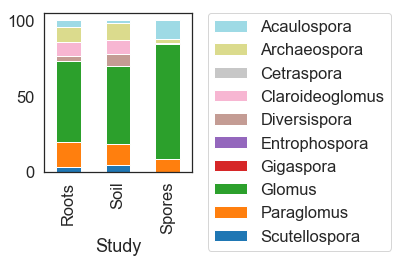

In [53]:
graphing_genus_study = rel_otu_table_complex.groupby('Study').mean()
graphing_genus_study = graphing_genus_study[graphing_genus_study.columns[::-1]]
ax = graphing_genus_study.plot(kind='bar', stacked=True, cmap=plt.cm.tab20)
# plt.legend(bbox_to_anchor=(1.05, 1) borderaxespad=0)
handles, labels = ax.get_legend_handles_labels()
lgd = ax.legend(handles[::-1], labels[::-1],bbox_to_anchor=(1.05, 1.05), loc=2)
plt.tight_layout()
# plt.savefig('output/alpha_100.png', dpi =500, bbox_extra_artists=(lgd,), bbox_inches='tight')

In [54]:
graphing_genus_study.T.to_csv('/home/ignorantiam/Documents/complete_AM_analysis_71817/Spores/relative_abund_genera.csv')
graphing_genus_study
other_columns = ['Cetraspora', 'Gigaspora', 'Entrophospora']
graphing_genus_study['Other'] = graphing_genus_study[other_columns].sum(axis = 1)
graphing_genus_study_other = graphing_genus_study.drop(other_columns, axis=1)
graphing_genus_study_other = graphing_genus_study_other[['Glomus','Paraglomus','Archaeospora','Claroideoglomus','Acaulospora','Diversispora','Scutellospora','Other']]
graphing_genus_study_other

,Glomus,Paraglomus,Archaeospora,Claroideoglomus,Acaulospora,Diversispora,Scutellospora,Other
Study,,,,,,,,
Roots,53.424896,16.468316,9.995895,9.303692,4.137335,3.405172,3.264694,0.000000
Soil,51.664171,14.076002,10.767702,9.638726,2.130332,7.378829,4.344237,0.000000
Spores,75.966062,8.520677,2.211410,0.313349,12.516460,0.011077,0.137751,0.323214


/home/ignorantiam/anaconda3/envs/py27/lib/python2.7/site-packages/matplotlib/figure.py:2299: UserWarning: This figure includes Axes that are not compatible with tight_layout, so results might be incorrect.
  warnings.warn("This figure includes Axes that are not compatible "
/home/ignorantiam/anaconda3/envs/py27/lib/python2.7/site-packages/matplotlib/figure.py:2299: UserWarning: This figure includes Axes that are not compatible with tight_layout, so results might be incorrect.
  warnings.warn("This figure includes Axes that are not compatible "


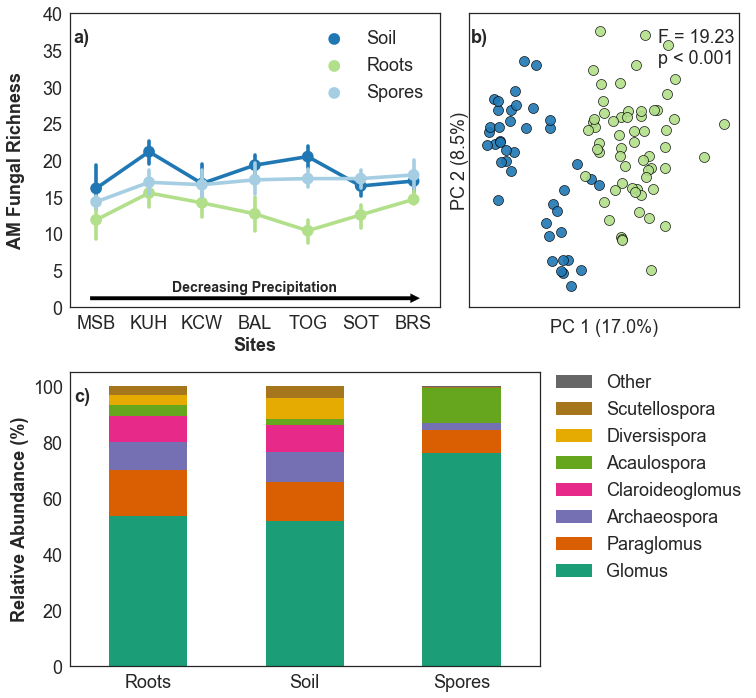

In [59]:
### Figure
# params = {'axes.labelsize': 18,'axes.titlesize':18, 'text.fontsize': 14, 
#            'legend.fontsize': 18, 'xtick.labelsize': 18, 'ytick.labelsize': 18}

# rcParams.update(params)

plt.figure(figsize = (12,12))
gs1 = gridspec.GridSpec(6, 7, hspace=1.2, wspace=0.4)
ax1 = plt.subplot(gs1[0:3, 0:4])
ax2 = plt.subplot(gs1[0:3, 4:7])
ax3 = plt.subplot(gs1[3:6, 0:5])

colors = ['#1f78b4','#b2df8a','#a6cee3']
labels = ['Soil', 'Roots', 'Spores']
x = test_df_full['PCA1']
y = test_df_full['PCA2']
study = ['Soil', 'Roots', 'Spores']
uniq = list(set(test_df_full['Study']))
sns.pointplot('Site','Richness', hue = 'Study', data = rich_table,
                 palette = colors, ax = ax1, scatter_kws = {'linewidth':0.69},
                 order = ['MSB','KUH','KCW','BAL','TOG','SOT','BRS']).set(ylim = (0,40))
ax1.set_ylabel('AM Fungal Richness', fontsize = 18, fontweight = 'bold')
ax1.set_xlabel('Sites', fontsize = 18, fontweight='bold')
ax1.tick_params(labelsize = 18)
ax1.tick_params(axis='x', labelsize = 18)
ax1.legend(loc='upper right', fontsize = 18)
ax1.annotate('a)',xy=(0.01, 0.95), xycoords='axes fraction',
                horizontalalignment='left', verticalalignment='top', size=18, fontweight = 'bold')
ax1.yaxis.set_label_coords(-0.12,0.5)
ax1.annotate('Decreasing Precipitation', xy=(0.5, 0.045), xycoords='axes fraction',
                horizontalalignment='center', verticalalignment='bottom', size=14, fontweight = 'bold')
ax1.annotate("",
            xy=(0.95, 0.03), xycoords='axes fraction',
            xytext=(0.05, 0.03), textcoords='axes fraction',
            arrowprops=dict(arrowstyle="simple",color = 'black',
                            connectionstyle="arc3"),
            )

for i in range(len(study)):
    ax2.scatter('PCA1', 'PCA2', data = test_df_full[test_df_full['Study'] == study[i]], 
                color = colors[i], alpha = 0.9, edgecolors = 'black', linewidth = 0.69, s = 100)

ax2.set_xlabel('PC %d (%.1f%%)' % (1, bc_pc_Ill_full.proportion_explained[0]*100), size=18)
ax2.set_ylabel('PC %d (%.1f%%)' % (2, bc_pc_Ill_full.proportion_explained[1]*100), size=18)
ax2.yaxis.set_label_coords(0,0.5)
ax2.annotate('F = ' + str(round(study_perm[4], 2)) + '\n' + 'p < ' + str(study_perm[5]),
            xy=(0.7, 0.95), xycoords='axes fraction',
            horizontalalignment='left', verticalalignment='top', size=18)

ax2.annotate('b)',xy=(0.01, 0.95), xycoords='axes fraction',
                horizontalalignment='left', verticalalignment='top', size=18, fontweight = 'bold')
ax2.set_xticklabels([])
ax2.set_yticklabels([])
ax2.grid(False)
plt.tight_layout()

### Bottom

graphing_genus_study_other.plot(kind='bar', stacked=True, cmap='Dark2', ax=ax3, fontsize=18)
handles, labels = ax3.get_legend_handles_labels()
lgd = ax3.legend(handles[::-1], labels[::-1],bbox_to_anchor=(1.0, 1.05), loc=2, fontsize = 18)
ax3.set_ylabel('Relative Abundance (%)', fontsize = 18, fontweight = 'bold')
ax3.tick_params(axis='x', rotation=0)
ax3.set_xlabel('')
ax3.annotate('c)',xy=(0.01, 0.95), xycoords='axes fraction',
                horizontalalignment='left', verticalalignment='top', size=18, fontweight = 'bold')
plt.tight_layout()

plt.savefig('output/diversity_bar_pcoa_abund.jpg', dpi =500, format = 'jpg',bbox_inches='tight')

In [55]:
# graphing_genus_study.to_csv('Summarized_rel_abund.csv')

/home/ignorantiam/anaconda3/envs/py27/lib/python2.7/site-packages/ipykernel_launcher.py:1: FutureWarning: 'Study' is both an index level and a column label.
Defaulting to column, but this will raise an ambiguity error in a future version
  """Entry point for launching an IPython kernel.


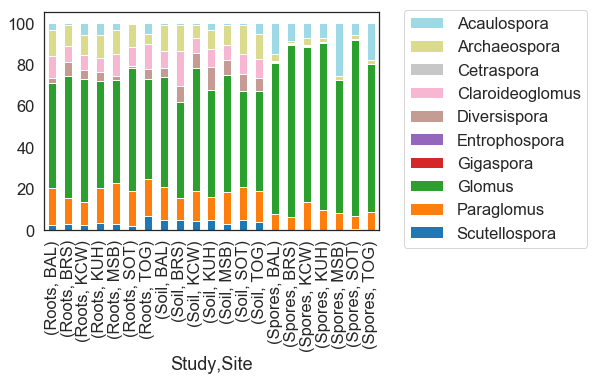

In [56]:
graphing_genus_site = rel_otu_table_complex.groupby(['Study','Site']).mean()
graphing_genus_site = graphing_genus_site[graphing_genus_site.columns[::-1]]
ax = graphing_genus_site.plot(kind='bar', stacked=True, cmap=plt.cm.tab20)
# plt.legend(bbox_to_anchor=(1.05, 1) borderaxespad=0)
handles, labels = ax.get_legend_handles_labels()
ax.legend(handles[::-1], labels[::-1],bbox_to_anchor=(1.05, 1.05), loc=2)
# plt.savefig('output/alpha_100__.png', dpi =500)

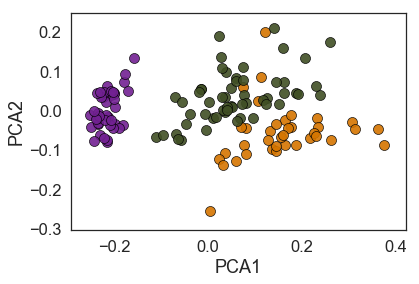

In [57]:
colors = ['#722192','#404F24', '#D57500'][::-1]
labels = ['Soil', 'Roots', 'Spores']
x = test_df_full_genus['PCA1']
y = test_df_full_genus['PCA2']
study = ['Soil', 'Roots', 'Spores']
uniq = list(set(test_df_full_genus['Study']))

for i in range(len(study)):
    sns.regplot('PCA1', 'PCA2', data = test_df_full_genus[test_df_full_genus['Study'] == study[i]], fit_reg=False,
                color = colors[i],
                 scatter_kws = {'alpha':0.9,'edgecolors':'black', 'linewidth':0.69, 's':100})

# plt.set_xlabel('PC %d (%.1f%%)' % (1, bc_pc_Ill_genus.proportion_explained[0]*100), size=20)
# plt.set_ylabel('PC %d (%.1f%%)' % (2, bc_pc_Ill_genus.proportion_explained[1]*100), size=20)

In [58]:
test_df_spores['Spore_total'] = spores_table.sort_index().sum(axis = 1)

In [59]:
test_df_spores.columns.values

array(['BarcodeSequence', 'LinkerPrimerSequence', 'Clusters', 'Study',
       'Site', 'Graztrt', 'PC1', 'PC2', 'LeafPmg', 'NPP', 'Bulk_Density',
       'Clay', 'Silt', 'Sand', 'pH_H2O', 'S_Plot', 'New_P_noBD', 'New_P',
       'AMF_NLFA_noBD', 'AMF_NLFA', 'TotCappm_noBD', 'TotCappm',
       'TotFeppm_noBD', 'TotFeppm', 'FetoP', 'Rainfall', 'SoilNpct_noBD',
       'SoilNpct', 'SOM_2012_noBD', 'SOM_2012', 'SOM', 'SoilNtoP',
       'Description', 'PC1x', 'PC2x', 'PC3x', 'PCA1', 'PCA2', 'PCA1_j',
       'PCA2_j', 'Spore_total'], dtype=object)

/home/ignorantiam/anaconda3/envs/py27/lib/python2.7/site-packages/matplotlib/figure.py:2299: UserWarning: This figure includes Axes that are not compatible with tight_layout, so results might be incorrect.
  warnings.warn("This figure includes Axes that are not compatible "


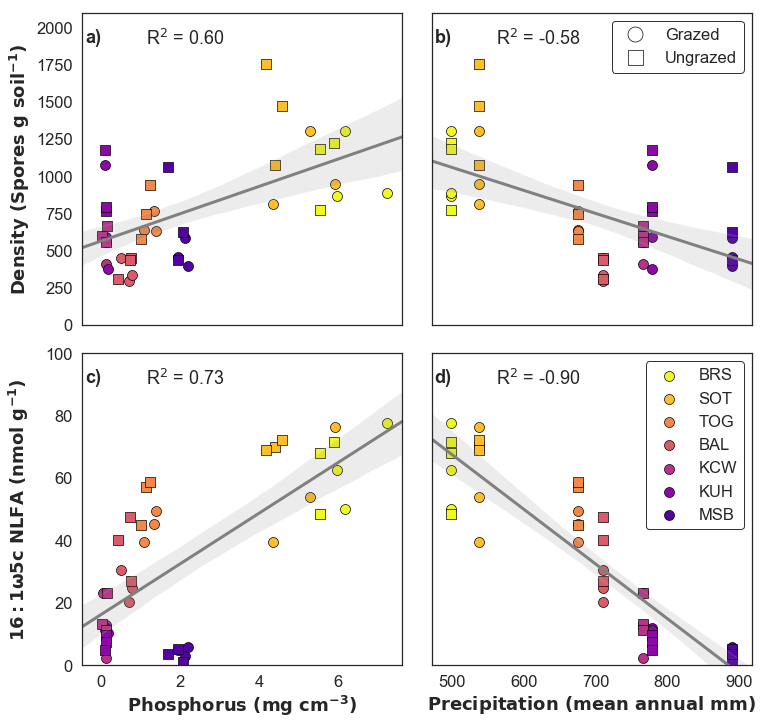

In [60]:
plt.figure(figsize = (12,12))
gs1 = gridspec.GridSpec(4, 4)
gs1.update(wspace=0.2, hspace = 0.2)
ax1 = plt.subplot(gs1[0:2, 0:2])
ax2 = plt.subplot(gs1[0:2, 2:4])
ax3 = plt.subplot(gs1[2:4, 0:2])
ax4 = plt.subplot(gs1[2:4, 2:4])

mapping = {'G' : 'o', 'UG': 's'}
sites = ['MSB','KUH','KCW','BAL','TOG','SOT','BRS'][::-1]
n = len(sites)
color=plt.cm.plasma_r(np.linspace(0,1,n+1))
#### Top left
g_treatments = ['G', 'UG']
g_names = ['Grazed', 'Ungrazed']
colors = ['#e41a1c', '#377eb8']
x = 'New_P'
y = 'Spore_total'
for j in range(len(g_treatments)):
    for i,c in zip(range(n),color):
        xs = test_df_spores[(test_df_spores['Site'] == sites[i]) & (test_df_spores['Graztrt'] == g_treatments[j])][x]
        ys = test_df_spores[(test_df_spores['Site'] == sites[i]) & (test_df_spores['Graztrt'] == g_treatments[j])][y]
        ax1.scatter(xs, ys, color = c, alpha=1,edgecolor='black',linewidth = 0.69, s=100,
                   marker=mapping[g_treatments[j]])
sns.regplot(x, y, data = test_df_spores, scatter=False,
                color = 'grey', ax = ax1, label = g_names[j], marker=mapping[g_treatments[j]],)
ax1.annotate('a)',xy=(0.01, 0.95), xycoords='axes fraction',
                horizontalalignment='left', verticalalignment='top', size=18, fontweight = 'bold')
totalR = round(stats.linregress(test_df_spores[x], test_df_spores[y])[2], 2)
# grazedR = round(stats.linregress(test_df_spores[test_df_spores['Graztrt'] =='G'][x], test_df_spores[test_df_spores['Graztrt'] =='G'][y])[2], 2)
# ungrazedR = round(stats.linregress(test_df_spores[test_df_spores['Graztrt'] =='UG'][x], test_df_spores[test_df_spores['Graztrt'] =='UG'][y])[2], 2)
ax1.annotate(r'R$^2$ = %.2f' % totalR,
                                   xy=(0.2, 0.95), xycoords='axes fraction',
                horizontalalignment='left', verticalalignment='top', size=18)
# ax1.annotate(r'Grazed R$^2$ = %.2f' % grazedR,
#                                    xy=(0.9, 0.3), xycoords='axes fraction',
#                 horizontalalignment='right', verticalalignment='top', size=18)
# ax1.annotate(r'Ungrazed R$^2$ = %.2f' % ungrazedR,
#                                    xy=(0.05, 0.7), xycoords='axes fraction',
#                 horizontalalignment='left', verticalalignment='top', size=18)
ax1.set_xlabel('')
ax1.set_ylabel(r'$\bf{Density\ (Spores\ g\ soil^{-1})}$')
# ax1.legend()
ax1.set(ylim=(0,2100))
ax1.get_xaxis().set_visible(False)
# ax1.legend(frameon=True, edgecolor = 'black', loc='upper left', bbox_to_anchor=(0.05, 1))
#slope, intercept, r_value, p_value, std_err = scipy.stats.linregress(x, y)

### Top right
y = 'Spore_total'
x = 'Rainfall'
for j in range(len(g_treatments)):
    for i,c in zip(range(n),color):
        xs = test_df_spores[(test_df_spores['Site'] == sites[i]) & (test_df_spores['Graztrt'] == g_treatments[j])][x]
        ys = test_df_spores[(test_df_spores['Site'] == sites[i]) & (test_df_spores['Graztrt'] == g_treatments[j])][y]
        ax2.scatter(xs, ys, color = c, alpha=1,edgecolor='black',linewidth = 0.69, s=100,
                   marker=mapping[g_treatments[j]])
sns.regplot(x, y, data = test_df_spores, ax = ax2, scatter=False, color = 'grey')
ax2.annotate('b)',xy=(0.01, 0.95), xycoords='axes fraction',
                horizontalalignment='left', verticalalignment='top', size=18, fontweight = 'bold', )
ax2.annotate(r'R$^2$ = %.2f' % round(stats.linregress(test_df_spores[x], test_df_spores[y])[2], 2),
                                   xy=(0.2, 0.95), xycoords='axes fraction',
                horizontalalignment='left', verticalalignment='top', size=18)
ax2.set_xlabel('')
ax2.set_ylabel('')
ax2.get_yaxis().set_visible(False)
ax2.get_xaxis().set_visible(False)
ax2.set(ylim=(0,2100))
legend_elements = [Line2D([0], [0], label='Grazed', marker = 'o', 
                          lw=0.69,markersize=15, color='w', markeredgecolor='black', markeredgewidth = 0.69),
                   Line2D([0], [0], label='Ungrazed', marker='s', 
                          lw=0.69,markersize=15, color='w', markeredgecolor='black', markeredgewidth = 0.69)]
ax2.legend(handles=legend_elements, frameon=True, edgecolor = 'black', loc='upper right', bbox_to_anchor=(1, 1))
### Bottom left
y = 'AMF_NLFA'
x = 'New_P'
for j in range(len(g_treatments)):
    for i,c in zip(range(n),color):
        xs = test_df_spores[(test_df_spores['Site'] == sites[i]) & (test_df_spores['Graztrt'] == g_treatments[j])][x]
        ys = test_df_spores[(test_df_spores['Site'] == sites[i]) & (test_df_spores['Graztrt'] == g_treatments[j])][y]
        ax3.scatter(xs, ys, color = c, alpha=1,edgecolor='black',linewidth = 0.69, s=100,
                   marker=mapping[g_treatments[j]])
sns.regplot(x, y, data = test_df_spores, ax = ax3, scatter=False, color = 'grey')
ax3.annotate('c)',xy=(0.01, 0.95), xycoords='axes fraction',
                horizontalalignment='left', verticalalignment='top', size=18, fontweight = 'bold')
ax3.annotate(r'R$^2$ = %.2f' % round(stats.linregress(test_df_spores[x], test_df_spores[y])[2], 2),
                                   xy=(0.2, 0.95), xycoords='axes fraction',
                horizontalalignment='left', verticalalignment='top', size=18)
ax3.set_xlabel(r'$\bf{Phosphorus\ (mg\ cm^{-3})}$')
ax3.set_ylabel(r'$\bf{16:1{\omega}5c\ NLFA\ (nmol\ g^{-1})}$', labelpad=14)
ax3.set(ylim=(0,100))
### Bottom right
x = 'Rainfall'
y = 'AMF_NLFA'
for j in range(len(g_treatments)):
    for i,c in zip(range(n),color):
        xs = test_df_spores[(test_df_spores['Site'] == sites[i]) & (test_df_spores['Graztrt'] == g_treatments[j])][x]
        ys = test_df_spores[(test_df_spores['Site'] == sites[i]) & (test_df_spores['Graztrt'] == g_treatments[j])][y]
        ax4.scatter(xs, ys, color = c, alpha=1,edgecolor='black',linewidth = 0.69, s=100,
                   marker=mapping[g_treatments[j]],label=sites[i])
# ax4.map(plt.scatter, x, y, s=100, linewidth =0.69, edgecolor='black')
sns.regplot(x, y, data = test_df_spores, ax = ax4, scatter=False, color = 'grey')
ax4.annotate('d)',xy=(0.01, 0.95), xycoords='axes fraction',
                horizontalalignment='left', verticalalignment='top', size=18, fontweight = 'bold')
ax4.annotate(r'R$^2$ = %.2f' % round(stats.linregress(test_df_spores[x], test_df_spores[y])[2], 2),
                                   xy=(0.2, 0.95), xycoords='axes fraction',
                horizontalalignment='left', verticalalignment='top', size=18)
ax4.set_xlabel(r'$\bf{Precipitation\ (mean\ annual\ mm)}$')
ax4.set_ylabel('')
ax4.get_yaxis().set_visible(False)
ax4.set(ylim=(0,100))
handles, labels = ax4.get_legend_handles_labels()
ax4.legend(handles[0:7], labels[0:7], frameon=True, edgecolor = 'black', loc='upper right', bbox_to_anchor=(1, 1))

plt.tight_layout()
plt.savefig('output/linear_regressions.jpg', dpi =500, format = 'jpg',bbox_inches='tight')

In [66]:
import warnings
warnings.filterwarnings('ignore')

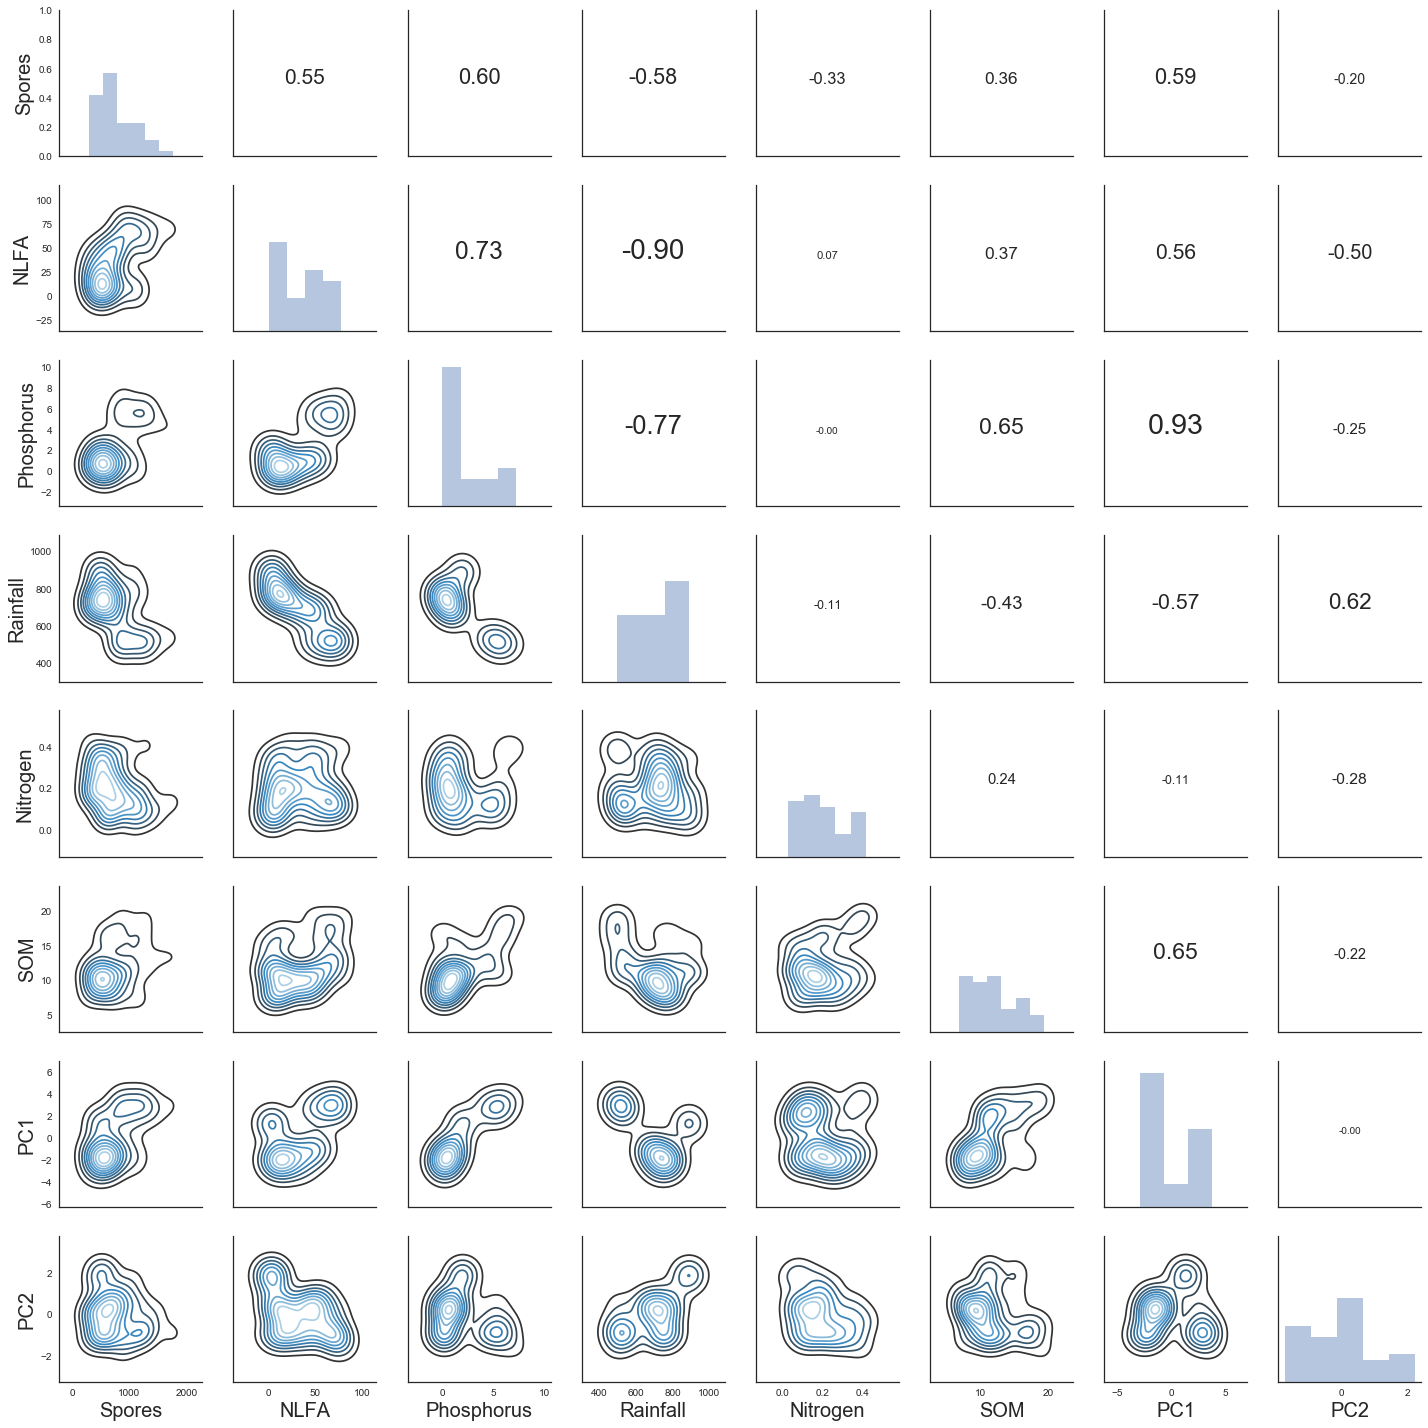

In [67]:
sns.set(style="white")

df = pd.DataFrame(test_df_spores, columns=['Spore_total','AMF_NLFA','New_P','Rainfall','SoilNpct','SOM_2012','PC1x','PC2x'])
length = len(df.columns)
replacements = {'Spore_total':'Spores','AMF_NLFA':'NLFA','New_P':'Phosphorus','SoilNpct':'Nitrogen',
                'SOM_2012':'SOM', 'PC1x':'PC1', 'PC2x':'PC2'}

def corrfunc(x, y, **kws):
    r, _ = stats.pearsonr(x, y)
    ax = plt.gca()
    ax.annotate("{:.2f}".format(r), horizontalalignment = 'center',
                xy=(.5, .5), xycoords=ax.transAxes, size = (10 + 20*abs(r)))

g = sns.PairGrid(df, palette=["red"])
# g.map_upper(plt.scatter, s=10)
g.map_diag(sns.distplot, kde=False)
g.map_lower(sns.kdeplot, cmap="Blues_d")
g.map_upper(corrfunc)

for i in range(length):
    for j in range(length):
        xlabel = g.axes[i][j].get_xlabel()
        ylabel = g.axes[i][j].get_ylabel()
        if xlabel in replacements.keys():
            g.axes[i][j].set_xlabel(replacements[xlabel])
        if ylabel in replacements.keys():
            g.axes[i][j].set_ylabel(replacements[ylabel])
for ax in plt.gcf().axes:
    l = ax.get_xlabel()
    ax.set_xlabel(l, fontsize=20)
    l = ax.get_ylabel()
    ax.set_ylabel(l, fontsize=20)
plt.tight_layout()
plt.savefig('output/Spore_corrgram.png', dpi = 500, format = 'png')